In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("fortune500.csv")

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [5]:
df.columns = ("year", "rank", "company", "revenue", "profit")

In [6]:
len(df)

25500

In [7]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [8]:
objProfits = df.profit.str.contains("[^0-9.-]")
df.loc[objProfits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [9]:
set(df.profit[objProfits])

{'N.A.'}

In [10]:
len(objProfits)

25500

I don't get why this objProfits is the length of the complete dataframe?
Isn't it supposed to be only the length of the profits which do not contain numbers, ints, floats

In [11]:
len(df.profit[objProfits])

369

Weirdly enough if you find the length of the dataframe with relation to the profit with the indices of objProfit then you can get the total number of non-number profits.
Really weird !? (Scratching my head)

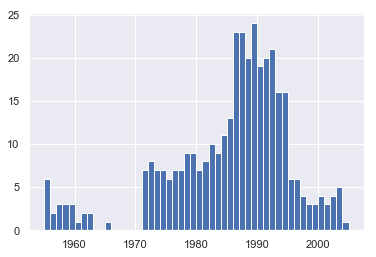

In [12]:
binSizes, _, _ = plt.hist(df.year[objProfits], bins = range(1955, 2006))

In [13]:
df = df.loc[~objProfits]
df.profit = df.profit.apply(pd.to_numeric)

In [14]:
len(df)

25131

In [15]:
25500-369

25131

In [16]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [17]:
groupByYear = df.loc[:, ["year", "revenue","profit"]].groupby("year")
averages = groupByYear.mean()
print(averages)
row = averages.index
column1 = averages.profit
column2 = averages.revenue

def plot(x, y, ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

           revenue       profit
year                           
1955    275.754453    16.732186
1956    323.604418    22.509237
1957    350.037626    23.181087
1958    377.977264    23.456740
1959    355.229376    19.279276
1960    395.231864    24.019439
1961    410.552410    23.340361
1962    419.556827    23.326104
1963    458.164200    26.965000
1964    490.181600    29.675800
1965    533.858517    34.543287
1966    596.118200    40.023000
1967    665.160800    44.155400
1968    717.771600    42.801200
1969    810.546400    48.387400
1970    889.436400    49.354800
1971    930.380122    43.952535
1972   1013.868699    47.585569
1973   1122.406085    56.448479
1974   1342.981744    78.461460
1975   1674.533401    88.345547
1976   1740.684178    76.774645
1977   1953.818256   100.138742
1978   2190.829532   107.128921
1979   2455.912220   125.347862
1980   2907.460446   158.932049
1981   3322.324797   165.021748
1982   3578.050000   171.926327
1983   3376.060285   125.104684
1984   3

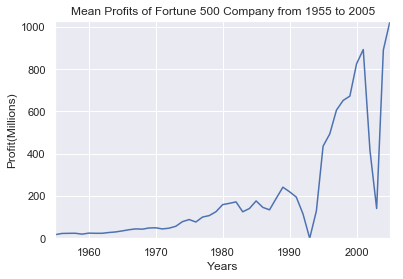

In [18]:
figure, axis = plt.subplots()
plot(row, column1, axis, "Mean Profits of Fortune 500 Company from 1955 to 2005", "Years", "Profit(Millions)")

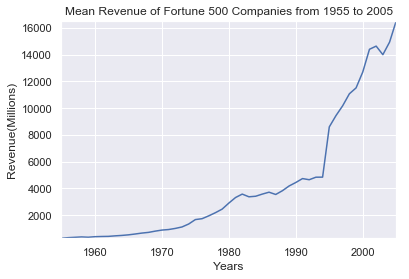

In [19]:
figure, axes = plt.subplots()
plot(row, column2, axes, "Mean Revenue of Fortune 500 Companies from 1955 to 2005", "Years", "Revenue(Millions)")

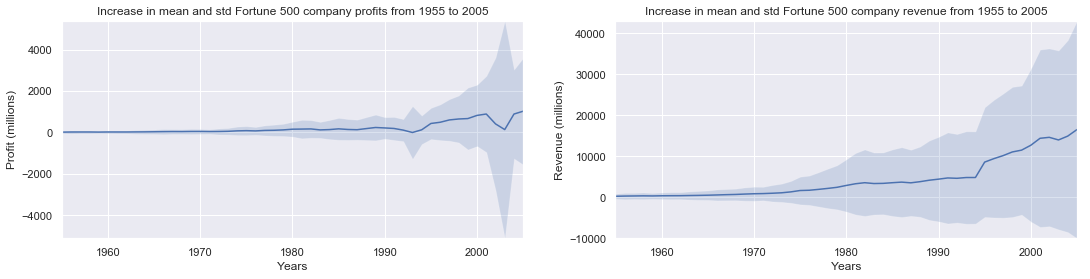

In [20]:
def plotWithStd(x, y, std, ax, title, x_label, y_label):
    ax.fill_between(x, y-std, y+std, alpha=0.2)
    plot(x, y, ax, title, x_label, y_label)
    
figure, (axis1, axis2) = plt.subplots(ncols=2)
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.subplots_adjust(left = 0.15, right = 2.5) #This seems like a better way to manually adjust the subplots showings
#figure.tight_layout() #This should space out the two subplots

title = "Increase in mean and std Fortune 500 company %s from 1955 to 2005"
std1 = groupByYear.std().profit.values
std2 = groupByYear.std().revenue.values

plotWithStd(row, column1.values, std1, axis1, title % "profits", "Years", "Profit (millions)")
plotWithStd(row, column2.values, std2, axis2, title % "revenue", "Years", "Revenue (millions)")